In [1]:
import torch
import torchvision.datasets as datasets
import os
import torchvision.transforms as transforms
from torch.utils.data import WeightedRandomSampler, DataLoader
import torch.nn as nn

There are two ways to deal with database imbalances:

1. oversampling
2. class weightage

Class weightage is a simple technique when the classes are affected by loss values

In [2]:
loss_criterion_1 = nn.CrossEntropyLoss(weight=torch.tensor([1,50]))
# if we have two classes and 1 has 50 more images than the other

### Lets create an artificial dearth of images:

In [3]:
!mkdir ./dogs
!mkdir ./dogs/Chihuahua
!mkdir ./dogs/Beagle

In [4]:
!cp -r ../input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua/* ./dogs/Chihuahua

In [5]:
!cp -r ../input/stanford-dogs-dataset/images/Images/n02088364-beagle/n02088364_10108.jpg ./dogs/Beagle

In [6]:
len(os.listdir('./dogs/Chihuahua/')), len(os.listdir('./dogs/Beagle'))

# thus we arrive at a skewed database of 152 to 1

(152, 1)

### Creating a sampler

In [26]:
def findClassWeights(root_dir="../input/stanford-dogs-dataset/images/Images/"):
    class_weights = []
    for root, subdir, files in os.walk(root_dir):
#         print(files)
        if (len(files)>0):
            class_weights.append(1/len(files))
    return class_weights

In [16]:
findClassWeights(root_dir="./dogs")

[]
['n02085620_4700.jpg', 'n02085620_11140.jpg', 'n02085620_2507.jpg', 'n02085620_3006.jpg', 'n02085620_1617.jpg', 'n02085620_4673.jpg', 'n02085620_242.jpg', 'n02085620_730.jpg', 'n02085620_3681.jpg', 'n02085620_9399.jpg', 'n02085620_952.jpg', 'n02085620_1205.jpg', 'n02085620_13964.jpg', 'n02085620_1502.jpg', 'n02085620_1569.jpg', 'n02085620_3423.jpg', 'n02085620_14516.jpg', 'n02085620_2693.jpg', 'n02085620_13151.jpg', 'n02085620_6931.jpg', 'n02085620_3409.jpg', 'n02085620_13383.jpg', 'n02085620_11337.jpg', 'n02085620_806.jpg', 'n02085620_12334.jpg', 'n02085620_8611.jpg', 'n02085620_1455.jpg', 'n02085620_3875.jpg', 'n02085620_574.jpg', 'n02085620_9654.jpg', 'n02085620_4441.jpg', 'n02085620_9351.jpg', 'n02085620_14413.jpg', 'n02085620_10131.jpg', 'n02085620_3677.jpg', 'n02085620_3877.jpg', 'n02085620_1346.jpg', 'n02085620_7613.jpg', 'n02085620_7440.jpg', 'n02085620_8637.jpg', 'n02085620_4572.jpg', 'n02085620_1862.jpg', 'n02085620_1298.jpg', 'n02085620_2650.jpg', 'n02085620_3407.jpg', 'n

[0.006578947368421052, 1.0]

In [27]:
1/152

0.006578947368421052

In [18]:
my_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [20]:
dataset = datasets.ImageFolder("./dogs", transform=my_transforms)

1


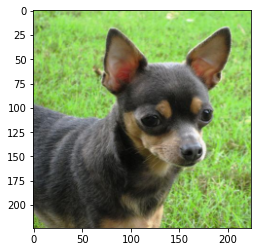

In [25]:
x,y  = dataset[152]

import matplotlib.pyplot as plt
print(y)
plt.imshow(x.permute(1,2,0))

In [29]:
def get_loader(root_dir,batch_size):
    
    dataset = datasets.ImageFolder(root_dir, transform=my_transforms)
    
    class_weights = findClassWeights()
    
#     print(class_weights)
    
    sample_weights = [0] * len(dataset)
    
    for idx, (data, target) in enumerate(dataset):
        class_weight = class_weights[target]
        sample_weights[idx] = class_weight
        
    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)
    
    loader = DataLoader(dataset=dataset, batch_size=batch_size, sampler=sampler)
    
    return loader

In [30]:
dataloader = get_loader(root_dir="./dogs", batch_size=8)

In [32]:
loader = get_loader(root_dir="./dogs", batch_size=8)

num_0 = 0
num_1 = 0
for epoch in range(3):
    for data, labels in loader:
        num_0 += torch.sum(labels==0)
        num_1 += torch.sum(labels==1)

print(num_0)
print(num_1)

# too much compensation

tensor(5)
tensor(454)
